In [1]:
#Importing libraries and modules:

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf
import keras

from sklearn.preprocessing import LabelEncoder

from sklearn import datasets

import itertools

plt.style.use("seaborn-colorblind")
%matplotlib inline
# only displays the most important warnings
#tf.logging.set_verbosity(tf.logging.FATAL)

import sklearn
%matplotlib inline

import tensorflow.compat.v1 as tf
#tf.Session()

import warnings
warnings.filterwarnings("ignore")

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Check the TF version
#print(tf.__version__)   #2.10.0

In [3]:
boston = pd.read_csv('/Users/lana-n/datacsv/Boston.csv')
boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
used_features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'black', 'lstat', 'medv']
boston = pd.read_csv('/Users/lana-n/datacsv/Boston.csv', usecols = used_features)
print(boston.shape)
boston.head(2)

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


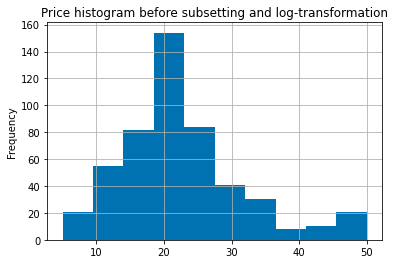

In [5]:
boston.medv.plot(kind='hist', grid=True)
plt.title("Price histogram before subsetting and log-transformation");

In [6]:
boston.medv.skew()

1.1080984082549072

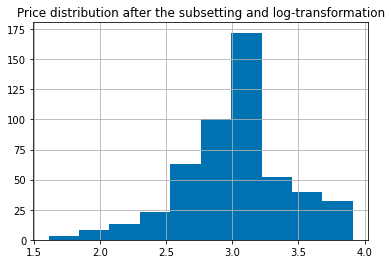

In [7]:
boston1 = boston[(boston["medv"]>3)&(boston["medv"]<60)]
target = np.log(boston1.medv)
target.hist()
plt.title("Price distribution after the subsetting and log-transformation");

In [8]:
boston1.medv.skew()

1.1080984082549072

In [9]:
features = boston.drop('medv',axis=1)
features.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [10]:
#df.shape     #506 rows 15 cols

In [11]:
#df.isnull().sum()

In [12]:
#df = df.dropna()

In [13]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [14]:
COLUMNS = boston.columns[1:]

COLUMNS

Index(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [15]:
COLUMNS.shape

(13,)

In [16]:
x = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv']]
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [17]:
y = boston['medv']

In [18]:
# splitting the training & test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2)

x_train.shape ,x_test.shape, y_train.shape ,y_test.shape

((404, 14), (102, 14), (404,), (102,))

In [19]:
train_df = x_train
test_df = x_test

In [20]:
# extract numpy data from a DataFrame
crim = train_df['crim'].values
zn = train_df['zn'].values
indus = train_df['indus'].values
chas = train_df['chas'].values
nox = train_df['nox'].values
rm = train_df['rm'].values
age = train_df['age'].values
dis = train_df['dis'].values
rad = train_df['rad'].values
tax = train_df['tax'].values
ptratio = train_df['ptratio'].values
black = train_df['black'].values
lstat = train_df['lstat'].values
medv = train_df['medv'].values
# create a dictionary
x_dict = {
    'crim': crim,
    'zn': zn,
    'indus': indus,
    'chas': chas,
    'nox': nox,
    'rm': rm,
    'age': age,
    'dis': dis,
    'rad': rad,
    'tax': tax,
    'ptratio': ptratio,
    'black': black,
    'lstat': lstat
}

In [21]:
def np_training_input_fn(x, y):
  return tf.estimator.inputs.numpy_input_fn(
      x= x,
      y= y,
      batch_size= 32,
      num_epochs= 5, # this way you can leave out steps from training
      shuffle= True,
      queue_capacity= 5000
  )

In [22]:
feature_cols = [tf.feature_column.numeric_column(k) for k in x_dict.keys()]
lin_model = tf.estimator.LinearRegressor(feature_columns=feature_cols)
lin_model.train(np_training_input_fn(x_dict, medv), steps=10)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/dr/cxmkqzs916b9s_d42g369_7w0000gn/T/tmpl8kw583n', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variab

In [23]:
def pd_input_fn(boston, y_label):
  return tf.estimator.inputs.pandas_input_fn(
      x=boston,
      y=boston[y_label],
      batch_size = 32,
      num_epochs = 5,
      shuffle = True,
      queue_capacity = 1000,
      num_threads = 1
  )

In [24]:
lin_model = tf.estimator.LinearRegressor(feature_columns=feature_cols)
lin_model.train(pd_input_fn(train_df, 'medv'), steps=10)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/dr/cxmkqzs916b9s_d42g369_7w0000gn/T/tmpcl0tzjtr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INF

In [25]:
lin_model.evaluate(input_fn = pd_input_fn(boston, boston.medv))
# print("Loss is " + str(loss))

KeyError: "None of [Float64Index([24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9,\n              ...\n              19.7, 18.3, 21.2, 17.5, 16.8, 22.4, 20.6, 23.9, 22.0, 11.9],\n             dtype='float64', length=506)] are in the [columns]"

In [ ]:
pred = list(lin_model.predict(input_fn = pd_input_fn))
pred = [p['predictions'][0] for p in pred]

In [ ]:
prices = np.exp(pred)
print(prices)
# Output 
array([  73.30127716,   76.89142609,   83.49259949, ...,  133.32876587,
         66.23993683,  135.94793701], dtype=float32)